<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [29]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [40]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [42]:
## Write your code here

columns_with_nulls = [col for col in df.columns if df[col].isnull().any()]
print(f"Number of columns containing null values: {len(columns_with_nulls)}")
columns_with_nulls

df['JobSat'] = df['JobSat'].bfill()

most_frequent = df['RemoteWork'].value_counts().idxmax()
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent)

missing_data = df[['Employment', 'JobSat', 'RemoteWork']]
missing_data.isnull().sum()


Number of columns containing null values: 108


Employment    0
JobSat        0
RemoteWork    0
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


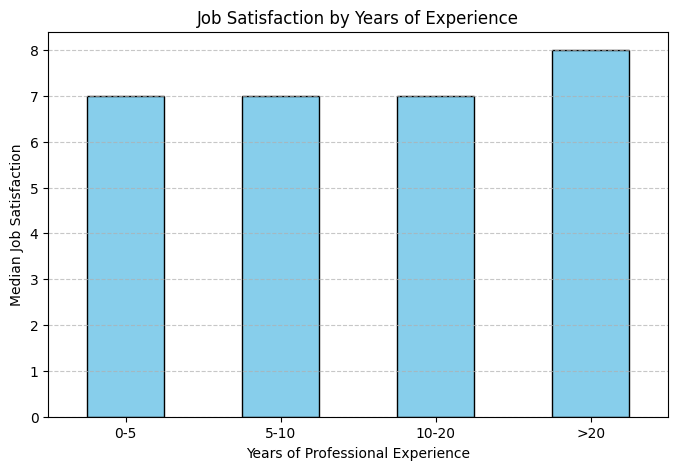

In [43]:
## Write your code here
subset_df = df[['JobSat', 'YearsCodePro']]
subset_df = subset_df.dropna(subset=['JobSat', 'YearsCodePro'])

subset_df['YearsCodePro'] = subset_df['YearsCodePro'].replace("Less than 1 year",0)
subset_df['YearsCodePro'] = subset_df['YearsCodePro'].replace("More than 50 years",55)

subset_df['YearsCodePro'] = subset_df['YearsCodePro'].astype(int)
subset_df['JobSat'] = subset_df['JobSat'].astype(int)
subset_df.dtypes

# Define experience ranges
bins = [0, 5, 10, 20, float('inf')] 
labels = ['0-5', '5-10', '10-20','>20']  
subset_df['Experience_Range'] = pd.cut(subset_df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median Job Satisfaction for each experience range
median_satisfaction = subset_df.groupby('Experience_Range', observed=True)['JobSat'].median()

# Plot Bar Chart
plt.figure(figsize=(8, 5))
median_satisfaction.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Job Satisfaction by Years of Experience')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


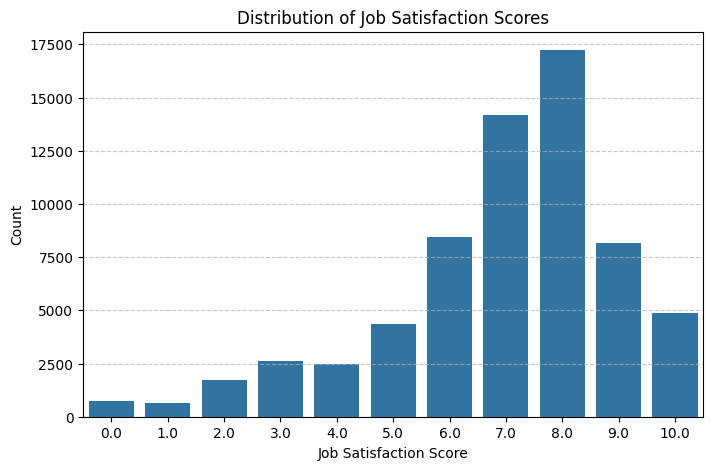

In [44]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Scores')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


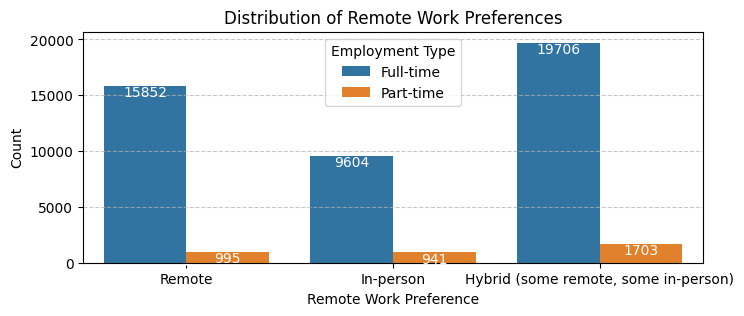

Employment_Type,Full-time,Part-time
RemoteWork,,
"Hybrid (some remote, some in-person)",19706,1703
In-person,9604,941
Remote,15852,995


In [48]:
## Write your code here
subset_df2 = df[['Employment', 'RemoteWork']].copy()

#Filter the rows with Employed
subset_df2 = subset_df2[subset_df2['Employment'].str.contains('Employed, full-time|Employed, part-time', regex=True, na=False)].copy()

# Create a new column for employment type
subset_df2['Employment_Type'] = subset_df2['Employment'].apply(
    lambda x: 'Full-time' if 'Employed, full-time' in x else 'Part-time'
)
subset_df2['RemoteWork'].fillna("In-person")

# Plot Count Plot for Remote Work Distribution
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=subset_df2, x='RemoteWork', hue='Employment_Type')

# Add value labels on top of bars
for p in ax.patches:
 ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 1.0),  # Adjust position
                ha='center', va='top',  # Center horizontally, align text to the top
                fontsize=10, color='white')  # Optional: Customize text appearance
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Preferences')
plt.legend(title='Employment Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cross tabulate remote work preferences
remote_work_ct = pd.crosstab(subset_df2['RemoteWork'],subset_df2['Employment_Type'])
remote_work_ct

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


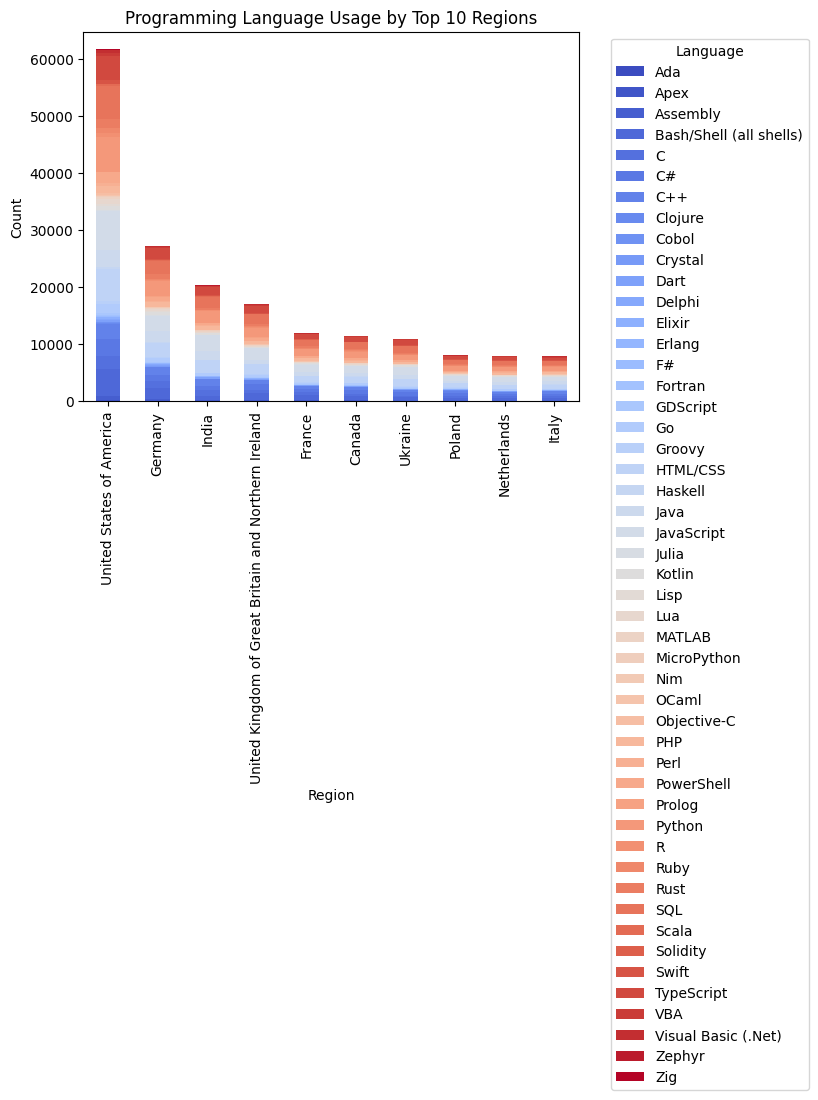

In [49]:
## Write your code here
subset_df3 = df[['LanguageHaveWorkedWith', 'Country']].copy()
subset_df3 = subset_df3.dropna(subset=['LanguageHaveWorkedWith'])
df_expanded = subset_df3.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
language_region_counts = df_expanded.groupby(['Country', 'Language']).size().unstack(fill_value=0)

# Plot Stacked Bar Chart for Top 10 Regions
top_regions = language_region_counts.sum(axis=1).nlargest(10).index
language_region_counts.loc[top_regions].plot(kind='bar', stacked=True, colormap="coolwarm")

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Programming Language Usage by Top 10 Regions')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


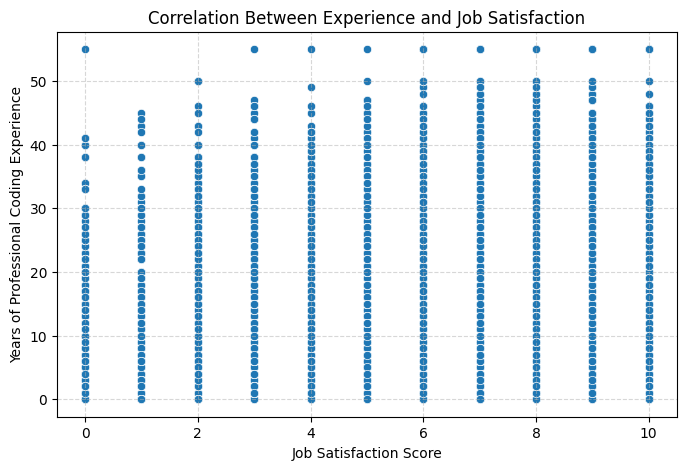

In [52]:
## Write your code here
subset_df.head()

# Scatter Plot: Years of Experience vs. Job Satisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(data=subset_df, x='JobSat', y='YearsCodePro')

plt.ylabel('Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.title('Correlation Between Experience and Job Satisfaction')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


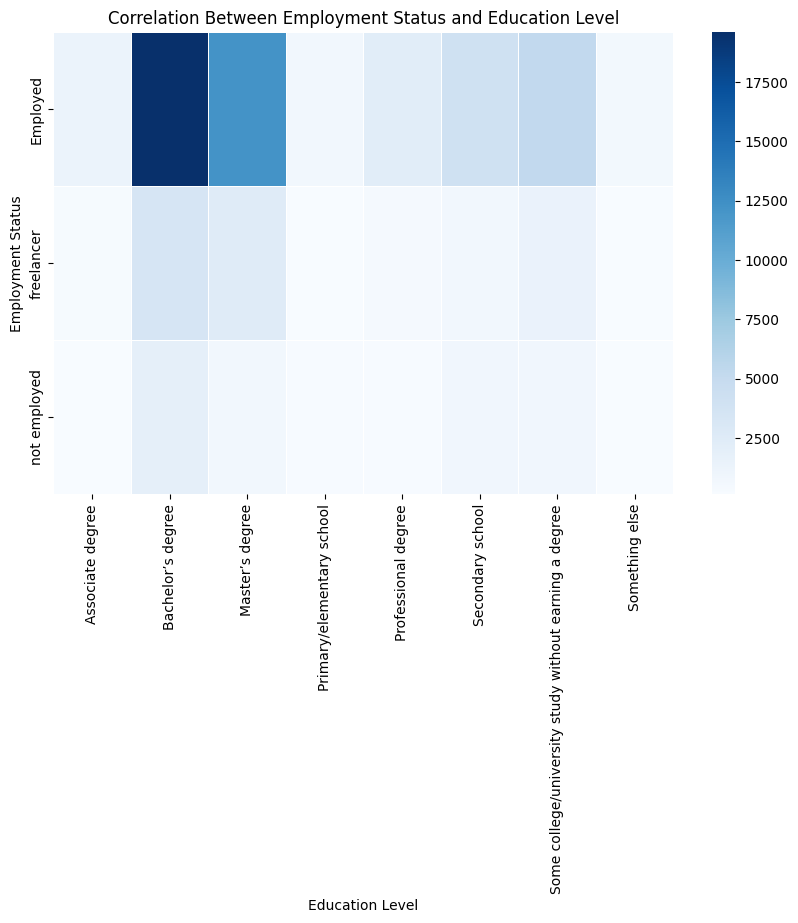

In [53]:
## Write your code here
def categorize_employment(status):
    if "Not employed" in status or "Retired" in status:
        return "not employed"
    elif "freelancer" in status:
        return "freelancer"
    elif "Employed, full-time" or "Student, full-time"  in status:
        return "Employed"
    else:
        return "others"

subset_df4 = df[['EdLevel', 'Employment']].copy()
subset_df4['EdLevel'] = subset_df4['EdLevel'].str.replace("â€™","",regex=False)
subset_df4['Employment_Status'] = subset_df4['Employment'].apply(categorize_employment)
subset_df4['EdLevel'] = subset_df4['EdLevel'].str.replace(r'\s*\(.*?\)', '', regex=True)
subset_df4.head(30)

# cross-tabulation table
employment_education_ct = pd.crosstab(subset_df4['Employment_Status'], subset_df4['EdLevel'])
plt.figure(figsize=(10, 6))
sns.heatmap(employment_education_ct, cmap="Blues", linewidths=0.5, cbar=True, annot=False)
plt.xlabel('Education Level')
plt.ylabel('Employment Status')
plt.title('Correlation Between Employment Status and Education Level')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


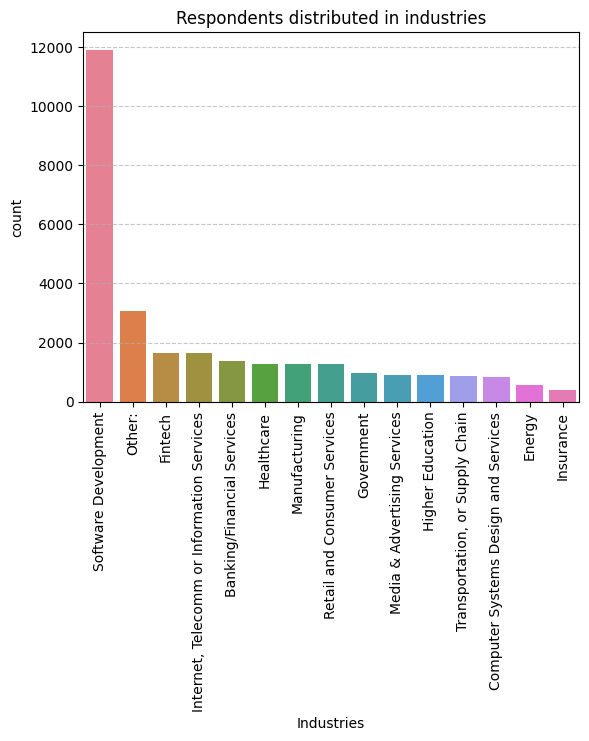

In [59]:
## Write your code here
df.to_pickle('modified_dataset.pkl')

# Explore how respondents are distributed across different industries
subset_df5 = df[['Industry']].copy()
subset_df5 = subset_df5.dropna(subset=['Industry'])
industry_counts = subset_df5['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values, hue=industry_counts.index, legend=False)
plt.xlabel('Industries')
plt.ylabel('count')
plt.title('Respondents distributed in industries')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
